In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ds = xr.open_mfdataset(f'../../downloads/CCMP/atBuoyLocs/CCMP_and_Buoy_02S_110W_xrr_MatchUp_240_mins_2000.nc')

In [7]:
ds

<xarray.Dataset>
Dimensions:                    (CC_TIME: 4352, TIME: 11688, TAO_TIME_INDEX: 73,
                                HEIGHT: 3, DEPTH: 1)
Coordinates:
  * CC_TIME                    (CC_TIME) datetime64[ns] 2001-01-01 ... 2005-1...
    latitude                   float64 ...
    longitude                  float64 ...
  * TIME                       (TIME) datetime64[ns] 2000-01-01 ... 2007-12-3...
  * TAO_TIME_INDEX             (TAO_TIME_INDEX) int64 -36 -35 -34 ... 34 35 36
  * HEIGHT                     (HEIGHT) float32 3.0 4.0 10.0
  * DEPTH                      (DEPTH) float32 1.0
Data variables: (12/346)
    uwnd                       (CC_TIME) float32 dask.array<chunksize=(4352,), meta=np.ndarray>
    vwnd                       (CC_TIME) float32 dask.array<chunksize=(4352,), meta=np.ndarray>
    ws                         (CC_TIME) float32 dask.array<chunksize=(4352,), meta=np.ndarray>
    nobs                       (CC_TIME) float32 dask.array<chunksize=(4352,), meta=np.ndarray>
    WDIR                       (CC_TIME, TAO_TIME_INDEX, HEIGHT) float32 dask.array<chunksize=(4352, 73, 3), meta=np.ndarray>
    WDIR_QC                    (CC_TIME, TAO_TIME_INDEX, HEIGHT) float32 dask.array<chunksize=(4352, 73, 3), meta=np.ndarray>
    ...                         ...
    mean WDIR 240min           (CC_TIME) float64 dask.array<chunksize=(4352,), meta=np.ndarray>
    std. dev. WDIR 240min      (CC_TIME) float64 dask.array<chunksize=(4352,), meta=np.ndarray>
    mean cosWDIR 240min        (CC_TIME) float64 dask.array<chunksize=(4352,), meta=np.ndarray>
    std. dev. cosWDIR 240min   (CC_TIME) float64 dask.array<chunksize=(4352,), meta=np.ndarray>
    mean sinWDIR 240min        (CC_TIME) float64 dask.array<chunksize=(4352,), meta=np.ndarray>
    std. dev. sinWDIR 240min   (CC_TIME) float64 dask.array<chunksize=(4352,), meta=np.ndarray>
Attributes: (12/54)
    contact:                       Remote Sensing Systems, support@remss.com
    Conventions:                   CF-1.7 ACDD-1.3
    data_structure:                grid
    title:                         RSS CCMP V3.1 6-hourly surface winds (Leve...
    summary:                       RSS VAM 6-hour analyses using ERA-5 wind r...
    institute_id:                  RSS
    ...                            ...
    time_coverage_end:             2000-01-01T23:59:59Z
    platform:                      Space-based Platforms>Earth Observation Sa...
    instrument:                    Earth Remote Sensing Instruments>Passive R...
    history:                       2024-04-01T18:28:35.496946Z - netCDF gener...
    base_date:                     Y2000 M01 D01
    date_created:                  2024-04-01T18:28:35.496946Z

In [22]:
CC_WSPD = ds['ws'].to_numpy()
CC_WDIR = np.rad2deg(np.arctan2(ds['vwnd'].to_numpy(), ds['uwnd'].to_numpy()))
CC_WDIR[CC_WDIR>180] -= 360

Ux = ds['mean Ux_10N 20min'].to_numpy()
Vy = ds['mean Vy_10N 20min'].to_numpy()

TAO_WSPD = np.sqrt(Ux**2 + Vy**2)
TAO_WDIR = np.rad2deg(np.arctan2(Vy, Ux))
TAO_WDIR[TAO_WDIR>180] -= 360

time = ds['CC_TIME'].to_numpy()

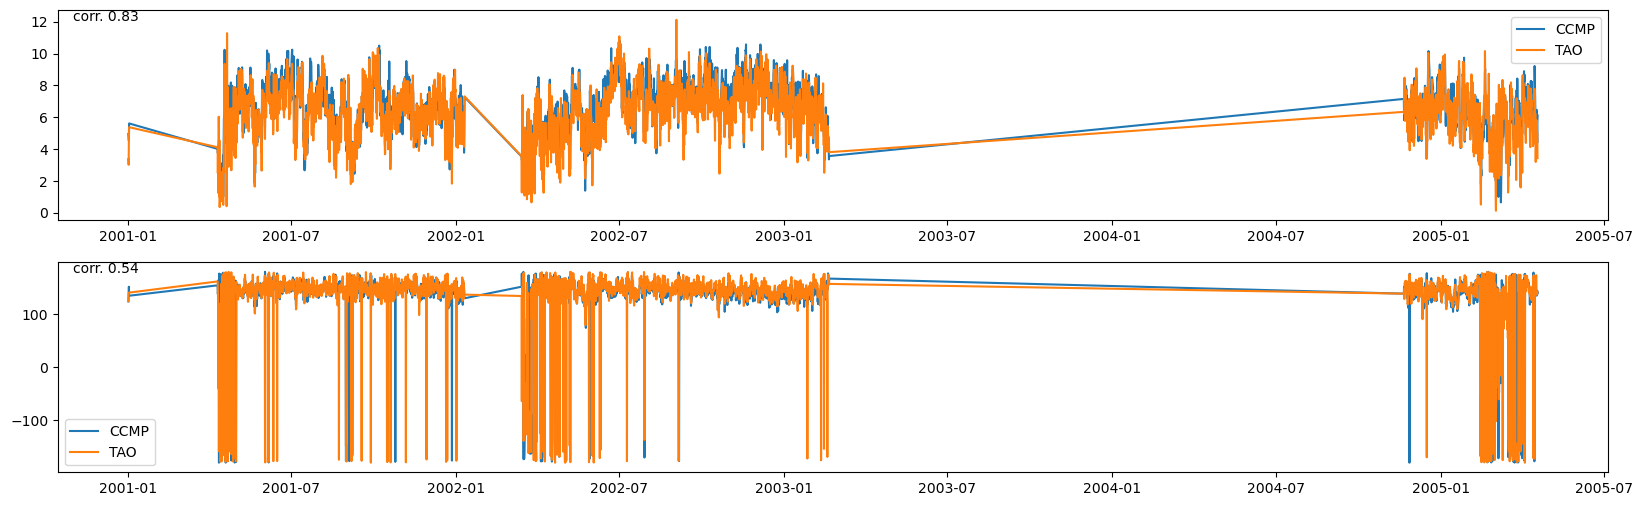

In [29]:
fig, axes = plt.subplots(nrows=2, figsize=(20,6))

mask = np.isnan(CC_WSPD)
mask += np.isnan(CC_WDIR)
mask += np.isnan(TAO_WSPD)
mask += np.isnan(TAO_WDIR)

CC_WSPD = CC_WSPD[~mask]
CC_WDIR = CC_WDIR[~mask]
TAO_WSPD = TAO_WSPD[~mask]
TAO_WDIR = TAO_WDIR[~mask]
time = time[~mask]

r_WSPD = np.corrcoef(CC_WSPD, TAO_WSPD)[0,1]
r_WDIR = np.corrcoef(CC_WDIR, TAO_WDIR)[0,1]
ax = axes[0]
ax.plot(time, CC_WSPD, label = 'CCMP')
ax.plot(time, TAO_WSPD, label = 'TAO')
ax.text(0.01, 0.95, f'corr. {r_WSPD:4.2f}', transform=ax.transAxes)

ax.legend()


ax = axes[1]
ax.plot(time, CC_WDIR, label = 'CCMP')
ax.plot(time, TAO_WDIR, label = 'TAO')
ax.text(0.01, 0.95, f'corr. {r_WDIR:4.2f}', transform=ax.transAxes)
ax.legend()


In [26]:
r_WDIR, r_WSPD

(0.5422369650119829, 0.8287874747832604)

In [7]:
ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

ntasks = len(taskList)

In [10]:
taskList[0][0]

-9

In [11]:
latitude = ds['latitude'].to_numpy()
longitude = ds['longitude'].to_numpy()

latIndex = np.argmin(abs(latitude - taskList[0][0]))
lonIndex = np.argmin(abs(longitude - taskList[0][1]))

In [12]:
selds  = ds.isel(latitude=[latIndex], longitude = [lonIndex])

In [13]:
selds

<xarray.Dataset>
Dimensions:    (time: 124, latitude: 1, longitude: 1)
Coordinates:
  * latitude   (latitude) float32 -9.125
  * longitude  (longitude) float32 0.125
  * time       (time) datetime64[ns] 2000-01-01 ... 2000-01-31T18:00:00
Data variables:
    uwnd       (time, latitude, longitude) float32 dask.array<chunksize=(4, 1, 1), meta=np.ndarray>
    vwnd       (time, latitude, longitude) float32 dask.array<chunksize=(4, 1, 1), meta=np.ndarray>
    ws         (time, latitude, longitude) float32 dask.array<chunksize=(4, 1, 1), meta=np.ndarray>
    nobs       (time, latitude, longitude) float32 dask.array<chunksize=(4, 1, 1), meta=np.ndarray>
Attributes: (12/54)
    contact:                       Remote Sensing Systems, support@remss.com
    Conventions:                   CF-1.7 ACDD-1.3
    data_structure:                grid
    title:                         RSS CCMP V3.1 6-hourly surface winds (Leve...
    summary:                       RSS VAM 6-hour analyses using ERA-5 wind r...
    institute_id:                  RSS
    ...                            ...
    time_coverage_end:             2000-01-01T23:59:59Z
    platform:                      Space-based Platforms>Earth Observation Sa...
    instrument:                    Earth Remote Sensing Instruments>Passive R...
    history:                       2024-04-01T18:28:35.496946Z - netCDF gener...
    base_date:                     Y2000 M01 D01
    date_created:                  2024-04-01T18:28:35.496946Z

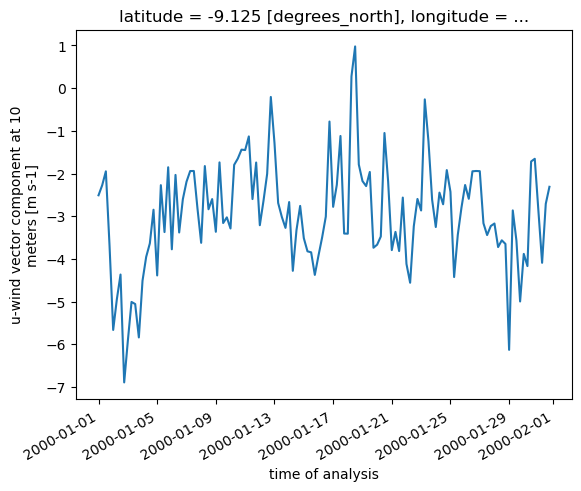

In [14]:
selds.uwnd.plot(x='time')

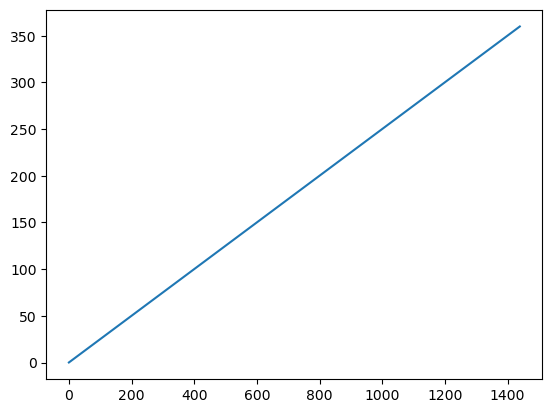

In [15]:
plt.plot(longitude)